In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [22]:
df = pd.read_csv("C:\\Users\\anjli\\Downloads\\td_loan_data.csv")


In [23]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [24]:
df.shape

(614, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Fill missing categorical values with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical values with median
num_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify all missing values handled
df.isnull().sum()


C:\Users\anjli\AppData\Local\Temp\ipykernel_16036\3385514189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\anjli\AppData\Local\Temp\ipykernel_16036\3385514189.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Gender: Female=0, Male=1

#### Married: No=0, Yes=1

#### Education: Not Graduate=0, Graduate=1

#### Self_Employed: No=0, Yes=1

#### Loan_Status: N=0, Y=1

In [28]:
df_encoded = df.copy()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [29]:

df_encoded.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [30]:
df['Property_Area']
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [31]:
df_encoded = pd.get_dummies(df_encoded, columns=['Property_Area'], drop_first=False)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    object 
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  Property_Area_Rural      614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

In [32]:
print(df_encoded.isnull().sum())

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [33]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,True
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,True


In [34]:
bool_cols = ['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [35]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [36]:
df_encoded.to_csv("C:/Users/anjli/Downloads/td_loan_data_encoded_clean.csv", index=False)

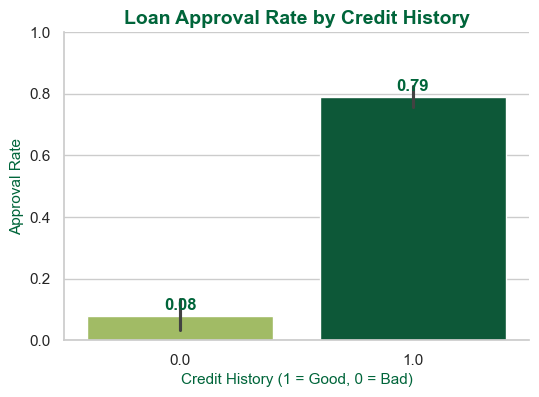

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

td_green = '#00653A'
td_light = '#A7C957'
td_mid = '#7CB342'

plt.figure(figsize=(6,4))
sns.barplot(
    x='Credit_History',
    y='Loan_Status',
    hue='Credit_History',        # future-proof fix
    data=df_encoded,
    palette=[td_light, td_green],
    legend=False
)

plt.title('Loan Approval Rate by Credit History', fontsize=14, weight='bold', color=td_green)
plt.xlabel('Credit History (1 = Good, 0 = Bad)', fontsize=11, color=td_green)
plt.ylabel('Approval Rate', fontsize=11, color=td_green)
plt.ylim(0, 1)

approval_rates = df_encoded.groupby('Credit_History')['Loan_Status'].mean().values
for i, val in enumerate(approval_rates):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold', color=td_green)

sns.despine()
plt.show()


###### Applicants with an established credit history are 7x more likely to be approved for loans than those without.
This confirms that credit history is the most influential factor in TD’s loan decisioning process and should remain a key feature in predictive modeling.

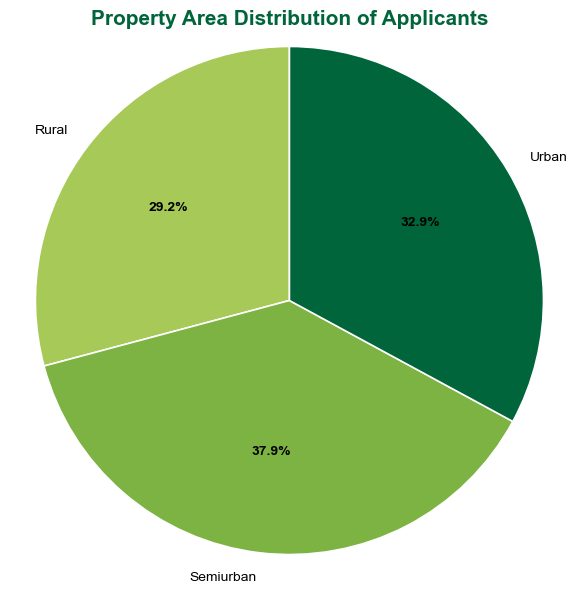

In [43]:
# --- STEP 1: Define the data for the pie chart ---
sizes = [
    df_encoded['Property_Area_Rural'].sum(),
    df_encoded['Property_Area_Semiurban'].sum(),
    df_encoded['Property_Area_Urban'].sum()
]

labels = ['Rural', 'Semiurban', 'Urban']

# --- STEP 2: Draw the pie chart ---
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=[td_light, td_mid, td_green],
    textprops={'fontsize':10, 'color':'black'},
    wedgeprops={'edgecolor':'white', 'linewidth':1.2}
)

# --- STEP 3: Style percentage labels ---
for text in autotexts:
    text.set_fontweight('bold')
    

# --- STEP 4: Title and layout ---
plt.title('Property Area Distribution of Applicants',
          fontsize=15, weight='bold', color=td_green)
plt.axis('equal')  # ensures the pie is circular
plt.tight_layout()
plt.show()


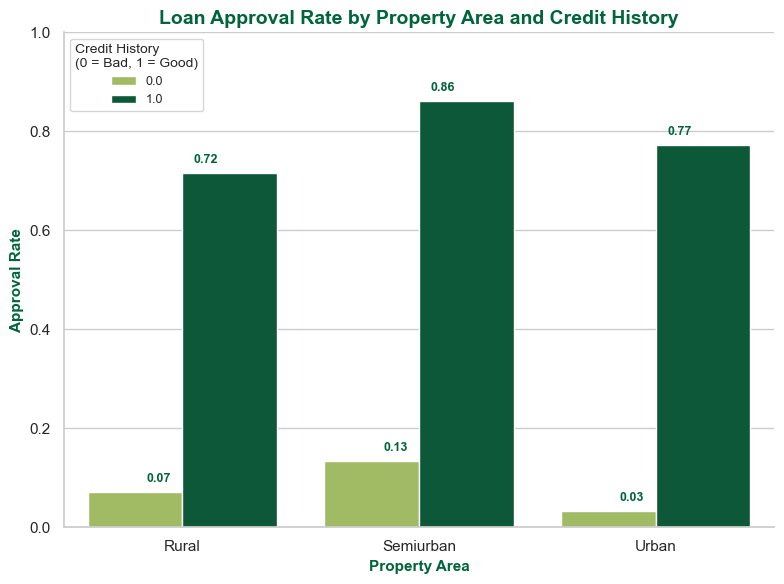

In [44]:


# Prepare readable Property Area column
df_encoded['Property_Area_Label'] = df_encoded[['Property_Area_Rural',
                                                'Property_Area_Semiurban',
                                                'Property_Area_Urban']].idxmax(axis=1)
df_encoded['Property_Area_Label'] = df_encoded['Property_Area_Label'].str.replace('Property_Area_', '')

# Calculate approval rates by Property Area and Credit History
approval_matrix = (
    df_encoded
    .groupby(['Property_Area_Label', 'Credit_History'])['Loan_Status']
    .mean()
    .reset_index()
)

# Plot grouped bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    x='Property_Area_Label',
    y='Loan_Status',
    hue='Credit_History',
    data=approval_matrix,
    palette=[td_light, td_green]
)

# Formatting
plt.title('Loan Approval Rate by Property Area and Credit History',
          fontsize=14, fontweight='bold', color=td_green)
plt.xlabel('Property Area', fontsize=11, color=td_green, fontweight='bold')
plt.ylabel('Approval Rate', fontsize=11, color=td_green, fontweight='bold')
plt.ylim(0, 1)
plt.legend(title='Credit History\n(0 = Bad, 1 = Good)', title_fontsize=10, fontsize=9, loc='upper left')

# Add value labels
for i, row in approval_matrix.iterrows():
    plt.text(
        x=i//2 + (0.1 if row['Credit_History'] else -0.1),
        y=row['Loan_Status'] + 0.02,
        s=f"{row['Loan_Status']:.2f}",
        ha='center', color=td_green, fontweight='bold', fontsize=9
    )

sns.despine()
plt.tight_layout()
plt.show()


In [45]:
bad_credit_summary = (
    df_encoded.groupby('Property_Area_Label')['Credit_History']
    .apply(lambda x: (x == 0).mean())
    .sort_values(ascending=False)
)

print(bad_credit_summary)


Property_Area_Label
Rural        0.156425
Urban        0.153465
Semiurban    0.128755
Name: Credit_History, dtype: float64


In [46]:
area_credit_loan = (
    df_encoded.groupby(['Property_Area_Label', 'Credit_History'])['Loan_Status']
    .mean()
    .reset_index()
)
print(area_credit_loan)


  Property_Area_Label  Credit_History  Loan_Status
0               Rural             0.0     0.071429
1               Rural             1.0     0.715232
2           Semiurban             0.0     0.133333
3           Semiurban             1.0     0.862069
4               Urban             0.0     0.032258
5               Urban             1.0     0.771930


In [47]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Label
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1,Urban
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,Rural
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,Urban
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,Urban
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,Urban


C:\Users\anjli\AppData\Local\Temp\ipykernel_16036\1339042394.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_encoded.pivot_table(values='Loan_Status', index='Income_Bin', columns='Loan_Bin', aggfunc='mean')


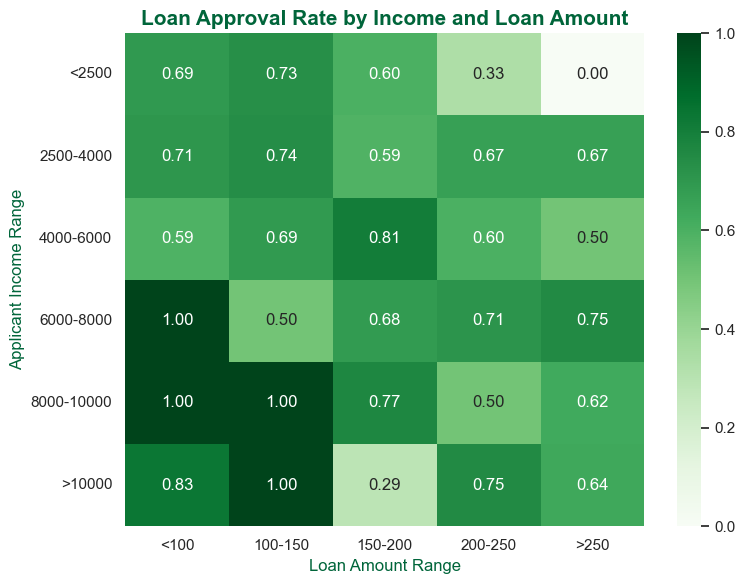

In [48]:
df_encoded['Income_Bin'] = pd.cut(df_encoded['ApplicantIncome'],
                                  bins=[0,2500,4000,6000,8000,10000,20000],
                                  labels=['<2500','2500-4000','4000-6000','6000-8000','8000-10000','>10000'])

df_encoded['Loan_Bin'] = pd.cut(df_encoded['LoanAmount'],
                                bins=[0,100,150,200,250,400],
                                labels=['<100','100-150','150-200','200-250','>250'])

pivot = df_encoded.pivot_table(values='Loan_Status', index='Income_Bin', columns='Loan_Bin', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Greens')
plt.title('Loan Approval Rate by Income and Loan Amount', fontsize=15, weight='bold', color=td_green)
plt.xlabel('Loan Amount Range', color=td_green)
plt.ylabel('Applicant Income Range', color=td_green)
plt.tight_layout()
plt.show()


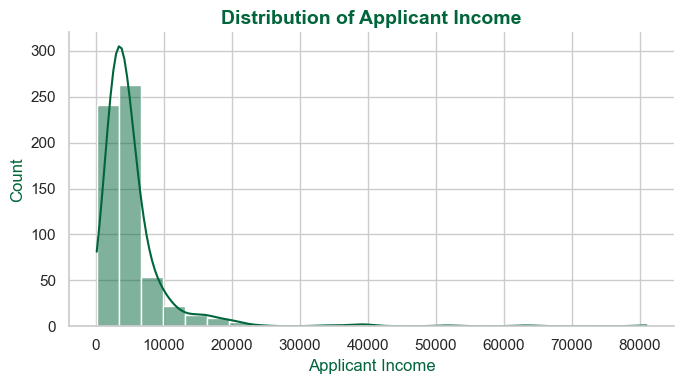

In [49]:
plt.figure(figsize=(7,4))
sns.histplot(df_encoded['ApplicantIncome'], bins=25, kde=True, color=td_green)
plt.title('Distribution of Applicant Income', fontsize=14, weight='bold', color=td_green)
plt.xlabel('Applicant Income', color=td_green)
plt.ylabel('Count', color=td_green)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\anjli\AppData\Local\Temp\ipykernel_16036\1986132040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_encoded, palette=[td_light, td_green])


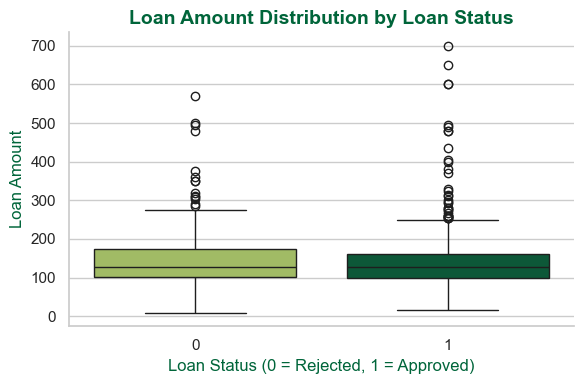

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_encoded, palette=[td_light, td_green])
plt.title('Loan Amount Distribution by Loan Status', fontsize=14, weight='bold', color=td_green)
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)', color=td_green)
plt.ylabel('Loan Amount', color=td_green)
sns.despine()
plt.tight_layout()
plt.show()


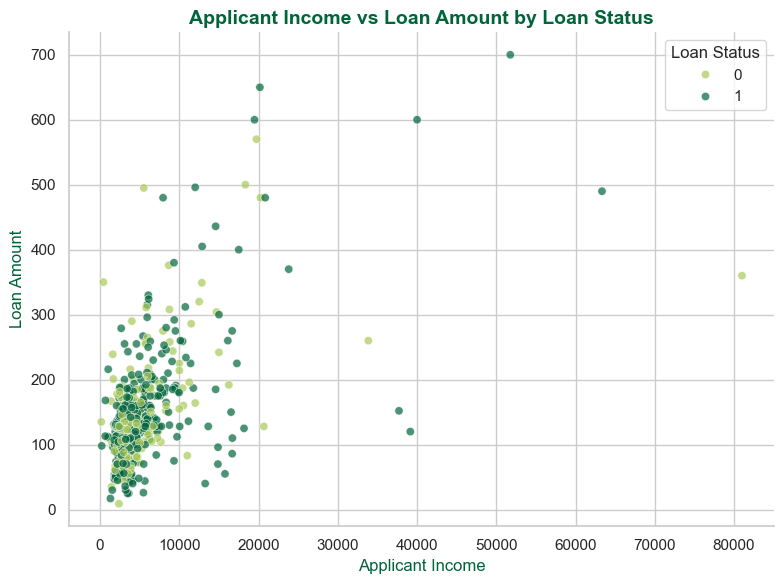

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df_encoded,
                palette={1:td_green, 0:td_light}, alpha=0.7)
plt.title('Applicant Income vs Loan Amount by Loan Status', fontsize=14, weight='bold', color=td_green)
plt.xlabel('Applicant Income', color=td_green)
plt.ylabel('Loan Amount', color=td_green)
plt.legend(title='Loan Status')
sns.despine()
plt.tight_layout()
plt.show()


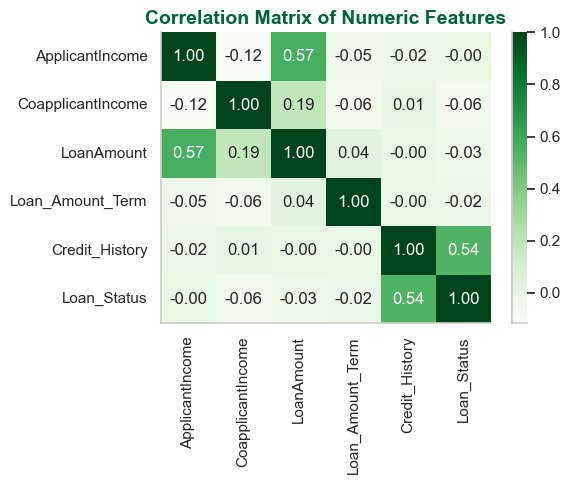

In [52]:
corr = df_encoded[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features', fontsize=14, weight='bold', color=td_green)
sns.despine()
plt.tight_layout()
plt.show()


In [53]:
df_encoded.head()
df_encoded['Dependents'].unique()
# Clean Dependents column
df_encoded['Dependents'] = df_encoded['Dependents'].replace('3+', 3).astype(float)



In [54]:
df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  614 non-null    object  
 1   Gender                   614 non-null    int64   
 2   Married                  614 non-null    int64   
 3   Dependents               614 non-null    float64 
 4   Education                614 non-null    int64   
 5   Self_Employed            614 non-null    int64   
 6   ApplicantIncome          614 non-null    int64   
 7   CoapplicantIncome        614 non-null    float64 
 8   LoanAmount               614 non-null    float64 
 9   Loan_Amount_Term         614 non-null    float64 
 10  Credit_History           614 non-null    float64 
 11  Loan_Status              614 non-null    int64   
 12  Property_Area_Rural      614 non-null    int64   
 13  Property_Area_Semiurban  614 non-null    int64   
 14  Property_A

C:\Users\anjli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anjli\AppData\Local\Temp\ipykernel_16036\3040390381.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette=[td_light, td_light, td_green])


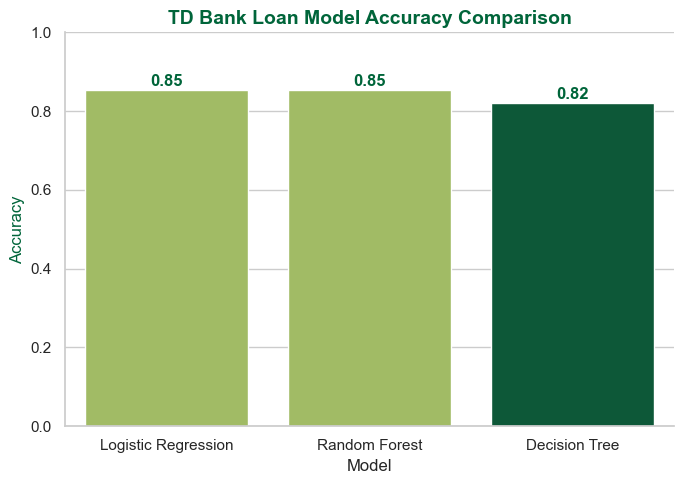


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123

In [55]:
# 1. Prepare Data
# Drop text and categorical columns not needed for model training
X = df_encoded.drop(columns=['Loan_ID', 'Loan_Status', 'Property_Area_Label', 'Income_Bin', 'Loan_Bin'])
y = df_encoded['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Define Models
log_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)

# 3. Train Models
log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 4. Predictions
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# 5. Evaluate & Compare
models = {
    'Logistic Regression': log_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred
}

results = [{'Model': name, 'Accuracy': accuracy_score(y_test, pred)} for name, pred in models.items()]
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# 6. Visualization
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette=[td_light, td_light, td_green])
plt.title('TD Bank Loan Model Accuracy Comparison', fontsize=14, weight='bold', color=td_green)
plt.ylabel('Accuracy', color=td_green)
plt.ylim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold', color=td_green)
sns.despine()
plt.tight_layout()
plt.show()

# 7. Detailed Reports
for name, pred in models.items():
    print(f"\n=== {name} ===")
    print(classification_report(y_test, pred))

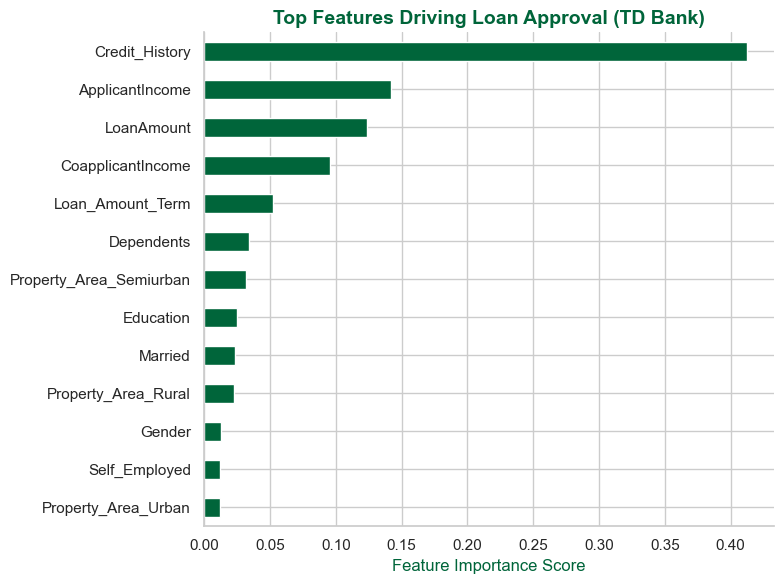

In [56]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='#00653A')
plt.title('Top Features Driving Loan Approval (TD Bank)', fontsize=14, weight='bold', color='#00653A')
plt.xlabel('Feature Importance Score', color='#00653A')
sns.despine()
plt.tight_layout()
plt.show()

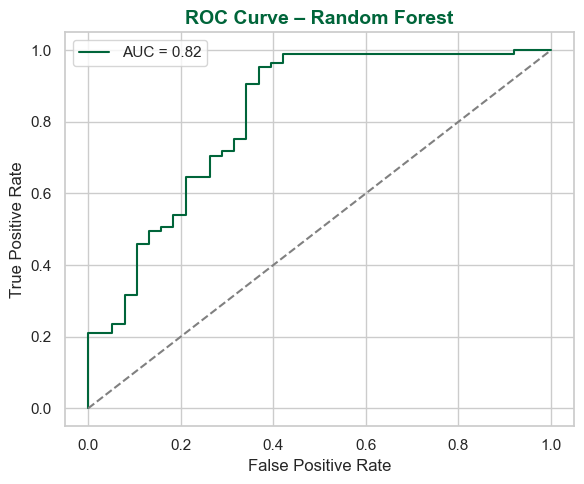

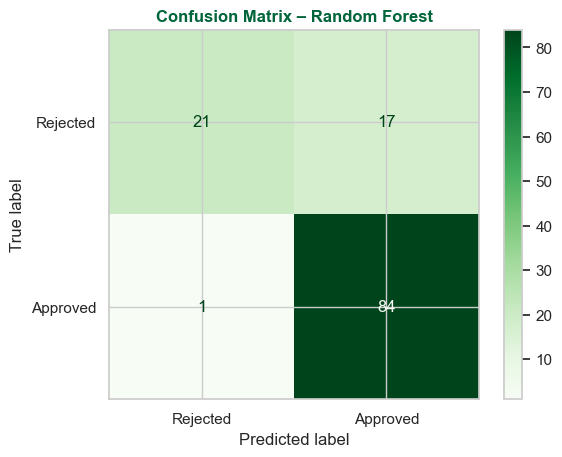

In [57]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# ROC curve
y_pred_proba = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='#00653A', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve – Random Forest', fontsize=14, color='#00653A', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected','Approved'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix – Random Forest', color='#00653A', weight='bold')
plt.show()


In [58]:
import joblib

# Save your trained Random Forest model
joblib.dump(rf_model, 'td_loan_model.pkl')

print("Model saved as td_loan_model.pkl")


Model saved as td_loan_model.pkl
